## Reading in data and MAJOR CLEANING


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
# Read in csv
df = pd.read_csv("Resources/Animal_Shelter_Louisville.csv")
df.head(10)


,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,SecondaryColor,...,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome
0,A366370,CAT,7/11/2008 10:50,STRAY,OTC,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,BROWN,...,FEARFUL,HEALTHY,ALTERED,12/11/2008 15:46,EUTH,FERAL,NaN,NaN,UNHEALTHY/UNTREATABLE,ALTERED
1,A366531,CAT,10/11/2008 10:20,STRAY,OTC,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,19/11/2008 20:10,EUTH,CONTAG DIS,NaN,SICK,HEALTHY,UNKNOWN
2,A532367,BIRD,23/7/2014 23:21,CONFISCATE,CRUELTY,RED,CHICKEN,NaN,MALE,BLACK,...,OTHER,HEALTHY,FERTILE,5/11/2014 15:49,TRANSFER,NaN,NaN,NaN,HEALTHY,FERTILE
3,A532474,OTHER,24/7/2014 18:29,ET REQUEST,NaN,BROWN,BAT,NaN,UNKNOWN,NaN,...,OTHER,HEALTHY,UNKNOWN,24/7/2014 23:59,EUTH,MEDICAL,NaN,OTHER,HEALTHY,UNKNOWN
4,A281756,DOG,11/9/2006 18:10,OWNER SUR,OTC,WHITE,PIT BULL TERRIER,NaN,MALE,BROWN,...,NORMAL,HEALTHY,FERTILE,12/9/2006 13:44,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE
5,A451184,BIRD,29/1/2012 15:25,OWNER SUR,FIELD,BLACK,CHICKEN,NaN,UNKNOWN,WHITE,...,NORMAL,HEALTHY,UNKNOWN,22/2/2012 23:59,TRANSFER,RESCUE GRP,NaN,NORMAL,HEALTHY,UNKNOWN
6,A256128,DOG,26/11/2005 12:35,STRAY,FIELD,BROWN,AMERICAN PIT BULL TERRIER,MIX,MALE,WHITE,...,NORMAL,HEALTHY,FERTILE,8/12/2005 23:59,EUTH,MEDICAL,NaN,NaN,HEALTHY,FERTILE
7,A314432,CAT,15/6/2007 17:13,OWNER SUR,OTC,BROWN TABBY,DOMESTIC SHORTHAIR,NaN,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,15/6/2007 18:07,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,UNKNOWN
8,A316619,DOG,29/6/2007 20:10,STRAY,FIELD,WHITE,LABRADOR RETRIEVER,MIX,MALE,TAN,...,FEARFUL,HEALTHY,FERTILE,4/7/2007 13:12,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE
9,A317335,CAT,5/7/2007 21:30,STRAY,OTC,GRAY,DOMESTIC SHORTHAIR,NaN,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,11/7/2007 9:19,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,UNKNOWN


In [3]:
# Check for nulls
df.isna().sum()

AnimalID                            0
AnimalType                          0
IntakeDate                          0
IntakeType                          0
IntakeSubtype                    4556
PrimaryColor                       17
PrimaryBreed                        0
SecondaryBreed                 110310
Gender                              0
SecondaryColor                  70263
DOB                             56224
IntakeReason                   116037
IntakeInternalStatus                0
IntakeAsilomarStatus                0
ReproductiveStatusAtIntake          0
OutcomeDate                       202
OutcomeType                       452
OutcomeSubtype                  26982
OutcomeReason                  150842
OutcomeInternalStatus          101121
OutcomeAsilomarStatus             202
ReproductiveStatusAtOutcome       202
dtype: int64

In [4]:
df.columns

Index(['AnimalID', 'AnimalType', 'IntakeDate', 'IntakeType', 'IntakeSubtype',
       'PrimaryColor', 'PrimaryBreed', 'SecondaryBreed', 'Gender',
       'SecondaryColor', 'DOB', 'IntakeReason', 'IntakeInternalStatus',
       'IntakeAsilomarStatus', 'ReproductiveStatusAtIntake', 'OutcomeDate',
       'OutcomeType', 'OutcomeSubtype', 'OutcomeReason',
       'OutcomeInternalStatus', 'OutcomeAsilomarStatus',
       'ReproductiveStatusAtOutcome'],
      dtype='object')

In [5]:
# Drop unnecessary columns
df2 = df.drop(columns=['AnimalID',
                       'IntakeType', 
                       'IntakeSubtype', 
                       'OutcomeSubtype',
                      'SecondaryColor',
                       'IntakeReason',
                      'ReproductiveStatusAtOutcome',
                       'OutcomeReason',
                      'OutcomeInternalStatus',
                      'OutcomeAsilomarStatus'])

In [6]:
df2.head()


,AnimalType,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
0,CAT,7/11/2008 10:50,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,NaN,FEARFUL,HEALTHY,ALTERED,12/11/2008 15:46,EUTH
1,CAT,10/11/2008 10:20,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaN,NORMAL,HEALTHY,UNKNOWN,19/11/2008 20:10,EUTH
2,BIRD,23/7/2014 23:21,RED,CHICKEN,NaN,MALE,NaN,OTHER,HEALTHY,FERTILE,5/11/2014 15:49,TRANSFER
3,OTHER,24/7/2014 18:29,BROWN,BAT,NaN,UNKNOWN,NaN,OTHER,HEALTHY,UNKNOWN,24/7/2014 23:59,EUTH
4,DOG,11/9/2006 18:10,WHITE,PIT BULL TERRIER,NaN,MALE,11/9/2005 0:00,NORMAL,HEALTHY,FERTILE,12/9/2006 13:44,EUTH


In [7]:
# Change object to datetime so we can calculate AgeInMonth and DurationInShelter
df2["IntakeDate"] = pd.to_datetime(df2["IntakeDate"])
df2["DOB"] = pd.to_datetime(df2["DOB"])
df2["OutcomeDate"] = pd.to_datetime(df2["OutcomeDate"])

In [8]:
df2.dtypes

AnimalType                            object
IntakeDate                    datetime64[ns]
PrimaryColor                          object
PrimaryBreed                          object
SecondaryBreed                        object
Gender                                object
DOB                           datetime64[ns]
IntakeInternalStatus                  object
IntakeAsilomarStatus                  object
ReproductiveStatusAtIntake            object
OutcomeDate                   datetime64[ns]
OutcomeType                           object
dtype: object

In [9]:
df2.head()

,AnimalType,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
0,CAT,2008-07-11 10:50:00,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,NaT,FEARFUL,HEALTHY,ALTERED,2008-12-11 15:46:00,EUTH
1,CAT,2008-10-11 10:20:00,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaT,NORMAL,HEALTHY,UNKNOWN,2008-11-19 20:10:00,EUTH
2,BIRD,2014-07-23 23:21:00,RED,CHICKEN,NaN,MALE,NaT,OTHER,HEALTHY,FERTILE,2014-05-11 15:49:00,TRANSFER
3,OTHER,2014-07-24 18:29:00,BROWN,BAT,NaN,UNKNOWN,NaT,OTHER,HEALTHY,UNKNOWN,2014-07-24 23:59:00,EUTH
4,DOG,2006-11-09 18:10:00,WHITE,PIT BULL TERRIER,NaN,MALE,2005-11-09,NORMAL,HEALTHY,FERTILE,2006-12-09 13:44:00,EUTH


In [10]:
df2.groupby("AnimalType").count()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
AnimalType,,,,,,,,,,,
BIRD,1185,1185,1185,69,1185,310,1185,1185,1185,1185,1176
CAT,68741,68738,68741,2658,68741,39386,68741,68741,68741,68680,68563
DOG,77145,77131,77145,37715,77145,53709,77145,77145,77145,77008,76905
FERRET,91,91,91,0,91,51,91,91,91,91,91
LIVESTOCK,256,256,256,28,256,109,256,256,256,254,253
OTHER,1341,1341,1341,2,1341,292,1341,1341,1341,1340,1322
RABBIT,1139,1139,1139,30,1139,436,1139,1139,1139,1138,1138
REPTILE,263,263,263,26,263,86,263,263,263,263,262
RODENT,681,681,681,4,681,239,681,681,681,681,680


In [11]:
# Drop all rows NOT dog!
df3 = df2.drop(df2[(df2['AnimalType'] == "BIRD") | 
                   (df2['AnimalType'] == "CAT") |
                   (df2['AnimalType'] == "FERRET") |
                   (df2['AnimalType'] == "LIVESTOCK") |
                   (df2['AnimalType'] == "OTHER") |
                   (df2['AnimalType'] == "RABBIT") |
                   (df2['AnimalType'] == "REPTILE") |
                   (df2['AnimalType'] == "RODENT")].index)

In [12]:
df3.groupby("AnimalType").count()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
AnimalType,,,,,,,,,,,
DOG,77145,77131,77145,37715,77145,53709,77145,77145,77145,77008,76905


## Cleaning WITHIN dog
1. Drop unnessary columns
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner

In [13]:
# Found dog data, drop AnimalType column
df3 = df3.drop(columns=['AnimalType'])

In [14]:
# Quick check for missing values
# Solution - Going to drop NA in OutcomeType first, then work on others.  We will NOT drop Secondary breed until we
#            create Kelly's 3 BreedCategory column.
df3.isna().sum()

IntakeDate                        0
PrimaryColor                     14
PrimaryBreed                      0
SecondaryBreed                39430
Gender                            0
DOB                           23436
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                     137
OutcomeType                     240
dtype: int64

In [15]:
df3.columns

Index(['IntakeDate', 'PrimaryColor', 'PrimaryBreed', 'SecondaryBreed',
       'Gender', 'DOB', 'IntakeInternalStatus', 'IntakeAsilomarStatus',
       'ReproductiveStatusAtIntake', 'OutcomeDate', 'OutcomeType'],
      dtype='object')

In [16]:
# Drop rows where OutcomeType is null

df3 = df3.loc[df3.OutcomeType.notna(), ["IntakeDate", 
                                        'PrimaryColor',
                                        "PrimaryBreed", 
                                        "SecondaryBreed", 
                                        "Gender",
                                        'DOB',
                                        "IntakeInternalStatus", 
                                        'IntakeAsilomarStatus', 
                                        'ReproductiveStatusAtIntake', 
                                        'OutcomeDate',
                                        'OutcomeType']]


In [17]:
df3.shape

(76905, 11)

In [18]:
# Check for more nulls

# df3.apply(lambda x: sum(x.isnull()/len(df3)))
df3.isna().sum()

IntakeDate                        0
PrimaryColor                     14
PrimaryBreed                      0
SecondaryBreed                39296
Gender                            0
DOB                           23414
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                       6
OutcomeType                       0
dtype: int64

In [19]:
# # df2.groupby('OutcomeType').count()
# df2.groupby('Color').count().sort_values('OutcomeType', ascending=False)
df3.groupby('OutcomeType').count()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate
OutcomeType,,,,,,,,,,
ADOPTION,15368,15366,15368,9060,15368,13675,15368,15368,15368,15368
DIED,716,716,716,346,716,327,716,716,716,716
DISPOSAL,1127,1127,1127,360,1127,968,1127,1127,1127,1127
ET PROCESS,30,30,30,17,30,8,30,30,30,30
EUTH,30088,30079,30088,14527,30088,14610,30088,30088,30088,30087
FOSTER,1032,1032,1032,491,1032,998,1032,1032,1032,1030
INDEFINITE,1,1,1,1,1,0,1,1,1,1
MISSING,501,501,501,301,501,225,501,501,501,501
MISSING EX,2,2,2,1,2,2,2,2,2,2


In [20]:
# Drop all rows 'RTO'. Assuming that chip is checked at intake

df3 = df3.drop(df3[df3.OutcomeType == "RTO"].index)

In [21]:
df3.shape

(63710, 11)

In [22]:
# More nulls?  Keeping secondary breed for now
# df3.apply(lambda x: sum(x.isnull()/len(df3)))
df3.isna().sum()

IntakeDate                        0
PrimaryColor                     12
PrimaryBreed                      0
SecondaryBreed                31546
Gender                            0
DOB                           20875
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                       3
OutcomeType                       0
dtype: int64

In [23]:
df3.loc[df3['DOB'].isna()]

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
6,2005-11-26 12:35:00,BROWN,AMERICAN PIT BULL TERRIER,MIX,MALE,NaT,NORMAL,HEALTHY,FERTILE,2005-08-12 23:59:00,EUTH
8,2007-06-29 20:10:00,WHITE,LABRADOR RETRIEVER,MIX,MALE,NaT,FEARFUL,HEALTHY,FERTILE,2007-04-07 13:12:00,EUTH
15,2007-07-19 22:32:00,TRICOLOR,BEAGLE,MIX,NEUTERED MALE,NaT,NORMAL,HEALTHY,ALTERED,2007-07-08 12:13:00,EUTH
17,2005-12-21 14:30:00,WHITE,PIT BULL TERRIER,NaN,MALE,NaT,NORMAL,HEALTHY,FERTILE,2005-12-29 11:05:00,EUTH
18,2005-12-22 12:23:00,BROWN BRINDLE,AMERICAN PIT BULL TERRIER,AMERICAN PIT BULL TERRIER,MALE,NaT,NORMAL,HEALTHY,FERTILE,2005-12-28 10:35:00,EUTH
...,...,...,...,...,...,...,...,...,...,...,...
150756,2009-05-12 12:58:00,TRICOLOR,POMERANIAN,NaN,SPAYED FEMALE,NaT,NORMAL,HEALTHY,FERTILE,2009-12-18 10:05:00,ADOPTION
150759,2011-03-17 23:22:00,WHITE,JACK RUSS TER,MIX,NEUTERED MALE,NaT,NORMAL,HEALTHY,FERTILE,2011-07-05 23:59:00,TRANSFER
150760,2010-03-28 14:50:00,BROWN,POMERANIAN,PAPILLON,SPAYED FEMALE,NaT,NORMAL,HEALTHY,FERTILE,2010-12-04 17:09:00,ADOPTION
150797,2009-11-24 09:37:00,TRICOLOR,BEAGLE,NaN,SPAYED FEMALE,NaT,EMACIATED,HEALTHY,FERTILE,2010-12-02 18:57:00,ADOPTION


#### PIVOT? Sacrifice PetAgeCat feature for 20K rows of Internal Status? - NO - keep it!


In [24]:
# ORIGINAL CODE BY DROPPING DOB!!
# Drop NA values in DOB (can't have nulls to calculate AgeInMonths)
df3 = df3.dropna(axis=0, subset=["DOB", 'PrimaryColor', 'OutcomeDate'])
df3.shape

# If DROPPING DOB
# df3 = df3.dropna(axis=0, subset=['PrimaryColor', 'OutcomeDate'])
# df3.shape

(42822, 11)

In [25]:
df3.isna().sum()

IntakeDate                        0
PrimaryColor                      0
PrimaryBreed                      0
SecondaryBreed                20998
Gender                            0
DOB                               0
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                       0
OutcomeType                       0
dtype: int64

In [26]:
# Create AgeInMonth column since data is cleaner now
df3['AgeInMonths'] = round(((df3['IntakeDate'] - df3['DOB']).dt.days)/30, 2)
df3.head()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,AgeInMonths
4,2006-11-09 18:10:00,WHITE,PIT BULL TERRIER,NaN,MALE,2005-11-09,NORMAL,HEALTHY,FERTILE,2006-12-09 13:44:00,EUTH,12.17
51,2008-05-21 10:24:00,BLACK,BORDER COLLIE,MIX,SPAYED FEMALE,2007-07-21,NORMAL,HEALTHY,ALTERED,2008-09-06 14:15:00,ADOPTION,10.17
69,2005-02-18 11:37:00,TAN,GOLDEN RETRIEVER,MIX,NEUTERED MALE,2003-03-18,NORMAL,HEALTHY,ALTERED,2005-04-15 15:03:00,ADOPTION,23.43
99,2007-06-11 19:54:00,WHITE,LABRADOR RETRIEVER,NaN,SPAYED FEMALE,2007-06-06,NORMAL,HEALTHY,ALTERED,2007-12-12 10:31:00,ADOPTION,0.17
103,2009-09-02 17:11:00,BLACK,PIT BULL TERRIER,NaN,MALE,2008-09-10,SICK,HEALTHY,FERTILE,2009-09-02 23:59:00,EUTH,11.90


In [27]:
# Create DurationInShelter column
df3['DurationInShelter'] = round(((df3['OutcomeDate'] - df3['IntakeDate']).dt.days), 2)
df3.head()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,AgeInMonths,DurationInShelter
4,2006-11-09 18:10:00,WHITE,PIT BULL TERRIER,NaN,MALE,2005-11-09,NORMAL,HEALTHY,FERTILE,2006-12-09 13:44:00,EUTH,12.17,29
51,2008-05-21 10:24:00,BLACK,BORDER COLLIE,MIX,SPAYED FEMALE,2007-07-21,NORMAL,HEALTHY,ALTERED,2008-09-06 14:15:00,ADOPTION,10.17,108
69,2005-02-18 11:37:00,TAN,GOLDEN RETRIEVER,MIX,NEUTERED MALE,2003-03-18,NORMAL,HEALTHY,ALTERED,2005-04-15 15:03:00,ADOPTION,23.43,56
99,2007-06-11 19:54:00,WHITE,LABRADOR RETRIEVER,NaN,SPAYED FEMALE,2007-06-06,NORMAL,HEALTHY,ALTERED,2007-12-12 10:31:00,ADOPTION,0.17,183
103,2009-09-02 17:11:00,BLACK,PIT BULL TERRIER,NaN,MALE,2008-09-10,SICK,HEALTHY,FERTILE,2009-09-02 23:59:00,EUTH,11.90,0


In [28]:
df4 = df3.drop(columns=['IntakeDate',
                       'DOB', 
                       'OutcomeDate'])

In [29]:
# More nulls?  Keeping secondary breed for now
df4.isna().sum()

PrimaryColor                      0
PrimaryBreed                      0
SecondaryBreed                20998
Gender                            0
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeType                       0
AgeInMonths                       0
DurationInShelter                 0
dtype: int64

In [30]:
df4.shape

(42822, 10)

## Add new features? Feature Engineering
1. New feature BreedCategory column - Mixed/Two/Pure Breed  
2. New feature InternalStatus column - Grouping "IntakeInternalStatus" eg. grouping all aggressive into 1 main agg group
3. Creating PetAgeCategory column - Baby/Young/Adult/Senior
4. Creating Sex column - Male/Female (With no internal status)

#### Feature Engineering 1 - Creating a BreedCategory column
* 0 = Breed has the word "Mix"
* 1 = If there are 2 breeds listed
* 2 = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [31]:
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77


In [32]:
df4.isna().sum()

PrimaryColor                      0
PrimaryBreed                      0
SecondaryBreed                20998
Gender                            0
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeType                       0
AgeInMonths                       0
DurationInShelter                 0
dtype: int64

In [33]:
# df3.SecondaryBreed.value_counts().sort_values(ascending=False).head(20)
# df3.SecondaryBreed.count()

In [34]:
# Add new column called BreedCategory, set all to Mix

df4["BreedCategory"]= "Two"
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20,Two
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85,Two
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5,Two
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0,Two
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7,Two
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55,Two
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1,Two
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0,Two
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172,Two
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77,Two


In [35]:
# Find rows containing word "Nan" in SecondaryBreed and set to Pure

df4.loc[df4['SecondaryBreed'].isnull(),'BreedCategory'] = "Pure"
df4.loc[500:1000, :]



,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20,Pure
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85,Pure
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5,Two
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0,Two
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7,Two
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55,Two
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1,Two
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0,Pure
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172,Pure
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77,Pure


In [36]:
# Find rows containing word "Mix"
df4.loc[df4["SecondaryBreed"].str.contains("MIX",  na=False), "BreedCategory"] = "Mix"
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20,Pure
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85,Pure
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5,Mix
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0,Mix
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7,Two
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55,Two
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1,Mix
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0,Pure
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172,Pure
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77,Pure


In [37]:
# Drop SeondaryBreed column since BreedCategory is available
df4 = df4.drop(columns=['SecondaryBreed'])
df4.shape

(42822, 10)

In [38]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,Pure


In [39]:
df4.isna().sum()

PrimaryColor                  0
PrimaryBreed                  0
Gender                        0
IntakeInternalStatus          0
IntakeAsilomarStatus          0
ReproductiveStatusAtIntake    0
OutcomeType                   0
AgeInMonths                   0
DurationInShelter             0
BreedCategory                 0
dtype: int64

### Feature Engineering 2 - Trying to Group "IntakeInternalStatus" column
* From 25 subcategories to 5

In [40]:
df4.groupby('IntakeInternalStatus').count()

,PrimaryColor,PrimaryBreed,Gender,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
IntakeInternalStatus,,,,,,,,,
AGED,2637,2637,2637,2637,2637,2637,2637,2637,2637
AGG ANIMAL,67,67,67,67,67,67,67,67,67
AGG BARRIE,4,4,4,4,4,4,4,4,4
AGG FEAR,34,34,34,34,34,34,34,34,34
AGG FOOD,5,5,5,5,5,5,5,5,5
AGG PEOPLE,131,131,131,131,131,131,131,131,131
AGGRESSIVE,1533,1533,1533,1533,1533,1533,1533,1533,1533
DEAD,1097,1097,1097,1097,1097,1097,1097,1097,1097
DEHYDRA,9,9,9,9,9,9,9,9,9


In [41]:
# df5.groupby("IntakeInternalStatus").count()
# df5.IntakeInternalStatus.value_counts().to_dict()

df4['IntakeStatus'] = "Sick"

In [42]:
# Group all AGG together
df4.loc[df4["IntakeInternalStatus"].str.contains("AGG"), "IntakeStatus"] = "Aggressive"

In [43]:
# Group all Normal together
df4.loc[df4["IntakeInternalStatus"].str.contains("NORMAL"), "IntakeStatus"] = "Normal"

In [44]:
df4.loc[df4["IntakeInternalStatus"] == "NORMAL"]

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure,Normal
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix,Normal
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix,Normal
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure,Normal
106,WHITE,ST BERNARD - SMOOTH COATED,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,3.03,5,Mix,Normal
...,...,...,...,...,...,...,...,...,...,...,...
150835,APRICOT,DANDIE DINMONT TERRIER,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,36.53,109,Mix,Normal
150836,BLACK,DACHSHUND - WIREHAIRED,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,36.53,71,Pure,Normal
150837,YELLOW BRINDLE,GREYHOUND,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,24.13,140,Mix,Normal
150838,CREAM,CAIRN TERRIER,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,7.07,7,Pure,Normal


In [45]:
# Add these to Aggresive
df4.loc[df4["IntakeInternalStatus"].str.contains("TERITORIAL"), "IntakeStatus"] = "Aggressive"
df4.loc[df4["IntakeInternalStatus"].str.contains("FERAL"), "IntakeStatus"] = "Aggressive"
df4.loc[df4["IntakeInternalStatus"].str.contains("FEARFUL"), "IntakeStatus"] = "Aggressive"

# Group these to Pregnant
df4.loc[df4["IntakeInternalStatus"].str.contains("NURSING"), "IntakeStatus"] = "Pregnant"
df4.loc[df4["IntakeInternalStatus"].str.contains("PREGNANT"), "IntakeStatus"] = "Pregnant"

# Group these to Other
df4.loc[df4["IntakeInternalStatus"].str.contains("AGED"), "IntakeStatus"] = "Other"
df4.loc[df4["IntakeInternalStatus"].str.contains("DEAD"), "IntakeStatus"] = "Other"
df4.loc[df4["IntakeInternalStatus"].str.contains("OTHER"), "IntakeStatus"] = "Other"
df4.loc[df4["IntakeInternalStatus"].str.contains("OBESE"), "IntakeStatus"] = "Other"

 




In [46]:
df4.groupby('IntakeStatus').count()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
IntakeStatus,,,,,,,,,,
Aggressive,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587
Normal,28451,28451,28451,28451,28451,28451,28451,28451,28451,28451
Other,5412,5412,5412,5412,5412,5412,5412,5412,5412,5412
Pregnant,874,874,874,874,874,874,874,874,874,874
Sick,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498


In [47]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure,Normal
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix,Normal
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix,Normal
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure,Normal
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,Pure,Sick


#### Handling Color - Option 1 (Grouping colors) - DID NOT CHANGE COLOR!!
* How does option1 effect RF/LogReg models?


In [48]:
# # How many unique color combinations?  - 333
# color_counts = df4['Color'].value_counts()
# # len(color_counts)
# print(df4['Color'].nunique())
# color_counts.head(20)

In [49]:
# # # Handling "Color" Option 1
# color_others = set(color_counts[color_counts < 1200].index)
# df4['Top_colors'] = df4['Color'].replace(list(color_others), 'Others')
# print(df4['Top_colors'].nunique())

In [50]:
# # Add new column called Color_new and set to Color
# df5 = df4.copy()
# df5["Color_new"]=df4["Color"]
# df5.head()
# df5.loc[320:330, :]

In [51]:
# Can't do this code here.  It takes COMBI tan/white and changes that to tan!  WRONG!!  I only want tan column


# Find rows containing colors: Gold/Yellow/Tan/Fawn/Buff/Apricot/Cream and set all to YELLOW
# df5.loc[df5["Color"].str.contains('Gold|Yellow|Tan|Fawn|Buff|Apricot|Cream'), "Color_new"] = "Tan"
# df5.loc[264:267, :]

### Feature Engineering 3 - Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [52]:
df4['PetAgeCategory'] = pd.cut(x=df4['AgeInMonths'], bins=[0, 6, 24, 84, 240], labels=['Baby', 'Young', 'Adult', 'Senior'])

In [53]:
df4.head(10)


,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure,Normal,Young
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix,Normal,Young
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix,Normal,Young
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure,Normal,Baby
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,Pure,Sick,Young
106,WHITE,ST BERNARD - SMOOTH COATED,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,3.03,5,Mix,Normal,Baby
209,BROWN,PIT BULL TERRIER,FEMALE,AGED,TREATABLE/MANAGEABLE,FERTILE,EUTH,109.57,8,Pure,Other,Senior
223,BROWN,WIRE-HAIRED POINTING GRIFFON,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,11.87,60,Mix,Normal,Young
227,BLACK,BEAGLE,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,0,Mix,Aggressive,Young
247,BROWN BRINDLE,PLOTT HOUND,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,FOSTER,25.83,154,Mix,Normal,Adult


### Feature Engineering 4 - Sex column


In [54]:
# Split gender because ReproductiveStatusAtIntake is similar to Gender
df4["Sex"] = "Male"

In [55]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure,Normal,Young,Male
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix,Normal,Young,Male
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix,Normal,Young,Male
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure,Normal,Baby,Male
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,Pure,Sick,Young,Male


In [56]:
# Find rows containing word "FEMALE" and set to Female
df4.loc[df4["Gender"].str.contains("FEMALE"), "Sex"] = "Female"

In [57]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure,Normal,Young,Male
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix,Normal,Young,Female
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix,Normal,Young,Male
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure,Normal,Baby,Female
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,Pure,Sick,Young,Male


## Changing to Binary Outcome - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [58]:
# Create new BINARY_OUTCOME column and set to 0/No/Deny

df4["BinaryOutcome"]="Deny"
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,BinaryOutcome
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,Pure,Normal,Young,Male,Deny
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,Mix,Normal,Young,Female,Deny
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,Mix,Normal,Young,Male,Deny
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,Pure,Normal,Baby,Female,Deny
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,Pure,Sick,Young,Male,Deny


In [59]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df4.loc[df4["OutcomeType"].str.contains("ADOPTION"), "BinaryOutcome"] = "Take"

In [60]:
df4.tail(10)

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,BinaryOutcome
150826,BLACK,BORDER COLLIE,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,12.17,15,Mix,Normal,Young,Male,Take
150828,BROWN,PIT BULL TERRIER,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,12.20,52,Two,Normal,Young,Male,Take
150830,BROWN,DACHSHUND,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,56.57,-123,Two,Normal,Adult,Female,Take
150831,WHITE,WEST HIGHLAND WHITE TERRIER,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,73.07,-137,Pure,Normal,Adult,Male,Deny
150832,BLACK,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,3.27,0,Two,Normal,Baby,Female,Take
150835,APRICOT,DANDIE DINMONT TERRIER,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,36.53,109,Mix,Normal,Adult,Male,Take
150836,BLACK,DACHSHUND - WIREHAIRED,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,36.53,71,Pure,Normal,Adult,Female,Take
150837,YELLOW BRINDLE,GREYHOUND,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,24.13,140,Mix,Normal,Adult,Male,Take
150838,CREAM,CAIRN TERRIER,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,7.07,7,Pure,Normal,Young,Female,Take
150839,BLACK,MINIATURE PINSCHER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,TRANSFER,51.30,8,Pure,Normal,Adult,Male,Deny


## Uncomment to save CLEAN dataset to csv if needed

In [61]:
# df4.to_csv('LouisvilleClean.csv')

## Final check before get_dummies

In [62]:
df4.columns

Index(['PrimaryColor', 'PrimaryBreed', 'Gender', 'IntakeInternalStatus',
       'IntakeAsilomarStatus', 'ReproductiveStatusAtIntake', 'OutcomeType',
       'AgeInMonths', 'DurationInShelter', 'BreedCategory', 'IntakeStatus',
       'PetAgeCategory', 'Sex', 'BinaryOutcome'],
      dtype='object')

In [63]:
# ORIGINAL CODE WITH PETAGECATEGORY
# Final dropping of duplicated columns
df5 = df4.drop(columns=[ 'Gender', 'IntakeInternalStatus','IntakeAsilomarStatus','ReproductiveStatusAtIntake','OutcomeType','AgeInMonths','DurationInShelter'])



In [64]:
df5.head()
df5.isnull().sum()
df5 = df5.dropna(axis=0, subset=["PetAgeCategory"])
df5.isnull().sum()
# df5.shape

PrimaryColor      0
PrimaryBreed      0
BreedCategory     0
IntakeStatus      0
PetAgeCategory    0
Sex               0
BinaryOutcome     0
dtype: int64

## Still get_dummies

In [65]:
df5.columns

Index(['PrimaryColor', 'PrimaryBreed', 'BreedCategory', 'IntakeStatus',
       'PetAgeCategory', 'Sex', 'BinaryOutcome'],
      dtype='object')

In [66]:
# ANGIE ANGIE took out petagecat - trying to see if additional 20L rows makes an improvement in the model
df6 = pd.get_dummies(df5[['PrimaryColor',
                          'PrimaryBreed', 
                          'BreedCategory', 
                          'IntakeStatus',
                          'PetAgeCategory',
                          'Sex',
                          "BinaryOutcome"]], drop_first=True)

In [67]:
df6.columns


Index(['PrimaryColor_BEIGE', 'PrimaryColor_BLACK',
       'PrimaryColor_BLACK BRINDLE', 'PrimaryColor_BLACK SMOKE',
       'PrimaryColor_BLACK TIGER', 'PrimaryColor_BLONDE', 'PrimaryColor_BLUE',
       'PrimaryColor_BLUE CREAM', 'PrimaryColor_BLUE MERLE',
       'PrimaryColor_BLUE TICKED',
       ...
       'BreedCategory_Two', 'IntakeStatus_Normal', 'IntakeStatus_Other',
       'IntakeStatus_Pregnant', 'IntakeStatus_Sick', 'PetAgeCategory_Young',
       'PetAgeCategory_Adult', 'PetAgeCategory_Senior', 'Sex_Male',
       'BinaryOutcome_Take'],
      dtype='object', length=256)

In [68]:
# Define X and y
X = df6.drop(['BinaryOutcome_Take'], axis="columns")
y = df6[['BinaryOutcome_Take']]

In [69]:
X.shape

(41535, 255)

In [70]:
y

,BinaryOutcome_Take
4,0
51,1
69,1
99,1
103,0
...,...
150835,1
150836,1
150837,1
150838,1


## Random Forest model


In [71]:
# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [72]:
# Import, initialize, fit and predict
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rf_model.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
predict_y_test = rf_model.predict(X_test)

In [74]:
# Validate - run accuracy score
from sklearn import metrics
print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

Accuracy score:  0.7022342064714946


In [75]:
from rfpimp import *

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [76]:
# total number of nodes in all decision trees of the forest and the height (in nodes) of the typical tree.
# The tree height matters because that is the path taken by the RF prediction mechanism and so tree height effects prediction speed.
print(f"{rfnnodes(rf_model):,d} tree nodes and {np.median(rfmaxdepths(rf_model))} median tree height")

1,196,702 tree nodes and 122.0 median tree height


In [77]:
# RF Feature importance?
feature_list = list(X.columns)
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False) 
print(feature_importance[0:10])

IntakeStatus_Normal              0.099756
Sex_Male                         0.070188
PetAgeCategory_Senior            0.055192
BreedCategory_Pure               0.037071
PrimaryBreed_PIT BULL TERRIER    0.032865
PetAgeCategory_Adult             0.032434
PetAgeCategory_Young             0.031989
BreedCategory_Two                0.027843
IntakeStatus_Other               0.026667
IntakeStatus_Sick                0.026658
dtype: float64


In [78]:
# Validate with cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=10, scoring="accuracy")
print(scores)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\model_selec

[0.72821377 0.71184401 0.69330766 0.69595571 0.72123255 0.72381411
 0.73416807 0.71851673 0.64314953 0.63062846]


In [79]:
scores.mean()

0.7000830591456009

In [86]:
from sklearn.metrics import mean_absolute_error, make_scorer
test_mae = mean_absolute_error(y_test, predict_y_test)
print(test_mae)

49.390408320493066


In [87]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_y_test)

array([[6002, 1085],
       [2007, 1290]], dtype=int64)

Confusion matrix, without normalization
[[6002 1085]
 [2007 1290]]
Normalized confusion matrix
[[0.84690278 0.15309722]
 [0.60873521 0.39126479]]


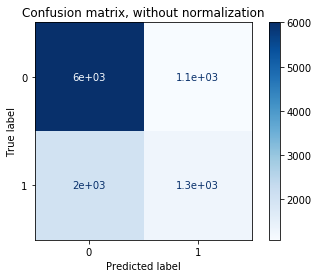

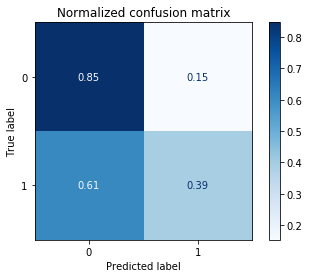

In [94]:
from sklearn.metrics import plot_confusion_matrix
class_names=["no", 'yes']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_model, X_test, y_test,
#                                  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## SVM


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)  

target = df6["BinaryOutcome_Take"]



In [82]:
from sklearn.svm import SVC 
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)

In [84]:
# Model Accuracy
print('Test Acc: %.3f' % svm_model.score(X_test, y_test))

Test Acc: 0.717


In [85]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = svm_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      7087
           1       0.58      0.41      0.48      3297

    accuracy                           0.72     10384
   macro avg       0.67      0.63      0.64     10384
weighted avg       0.70      0.72      0.70     10384

